**1. Importing the dependencies**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
!pip install scikit-learn==1.3.1;

**2. Data Loading and Understanding**

In [106]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [107]:
df.shape

(7043, 21)

In [108]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
pd.set_option("display.max_columns", None)

In [110]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [113]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [114]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
print(df["gender"].unique())

['Female' 'Male']


In [116]:
print(df["SeniorCitizen"].unique())

[0 1]


In [117]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [118]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [119]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [120]:
len(df[df["TotalCharges"]==" "])

11

In [121]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [122]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [124]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


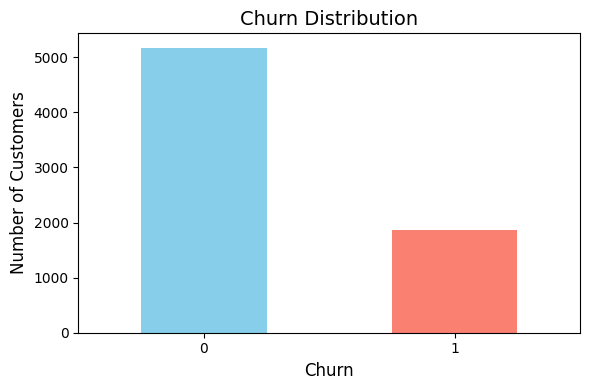

In [163]:
churn_counts = df['Churn'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Adding labels and title
plt.title('Churn Distribution', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [125]:
df.shape

(7043, 20)

In [126]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [127]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [128]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [129]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

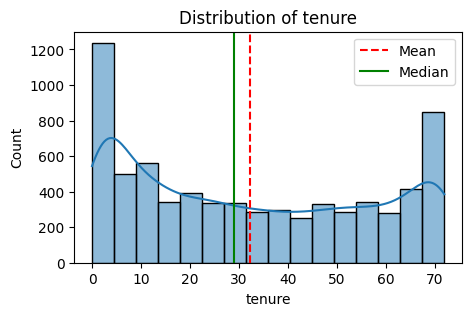

In [130]:
plot_histogram(df, "tenure")

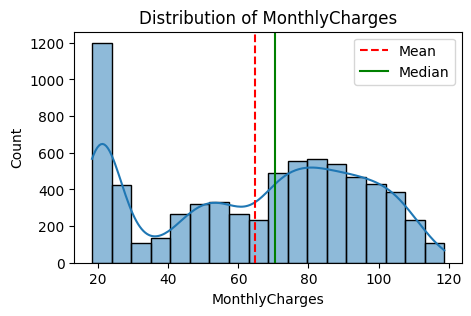

In [131]:
plot_histogram(df, "MonthlyCharges")

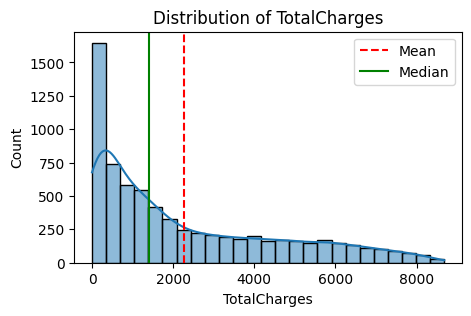

In [132]:
plot_histogram(df, "TotalCharges")

**Box plot for numerical features**

In [133]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

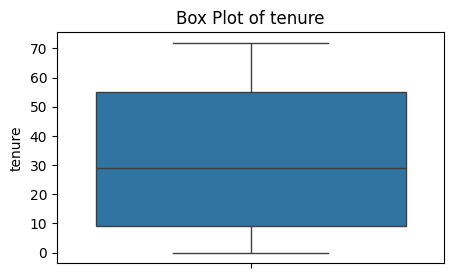

In [134]:
plot_boxplot(df, "tenure")

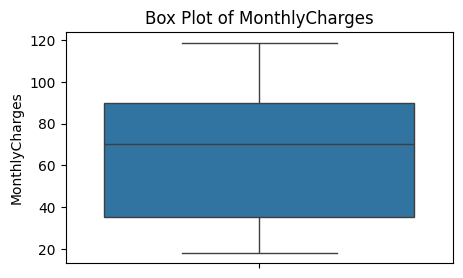

In [135]:
plot_boxplot(df, "MonthlyCharges")

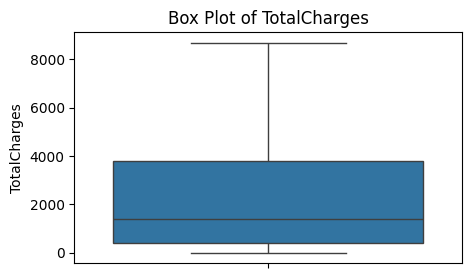

In [136]:
plot_boxplot(df, "TotalCharges")

Categorical features - Analysis

In [137]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Countplot for categorical columns

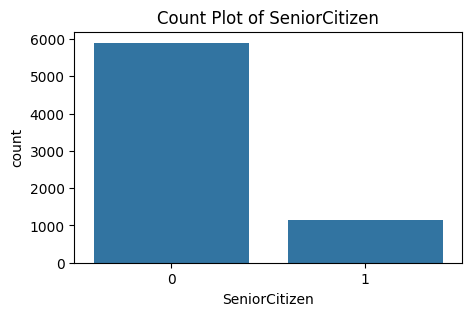

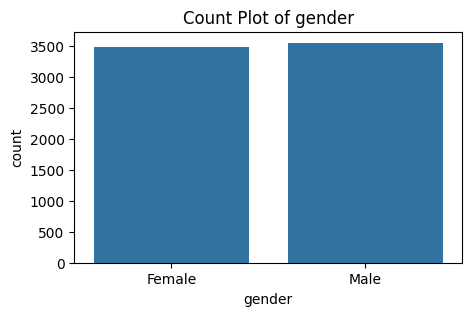

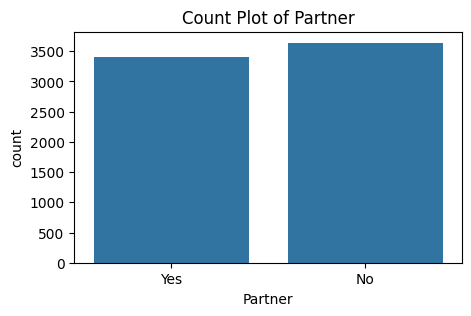

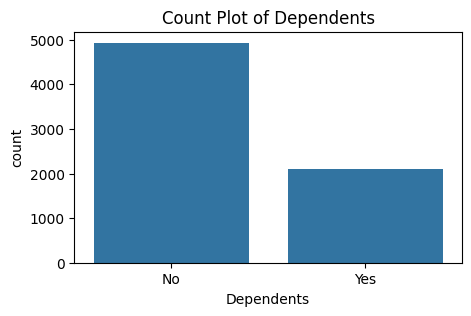

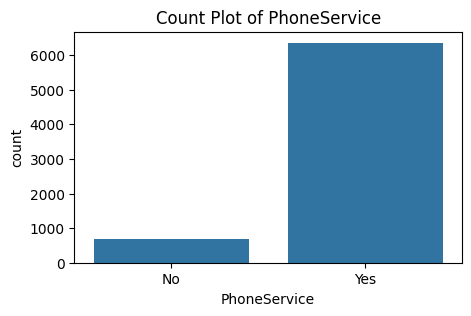

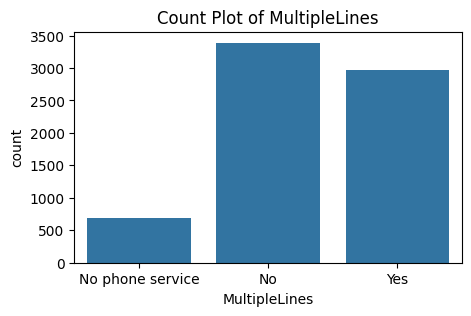

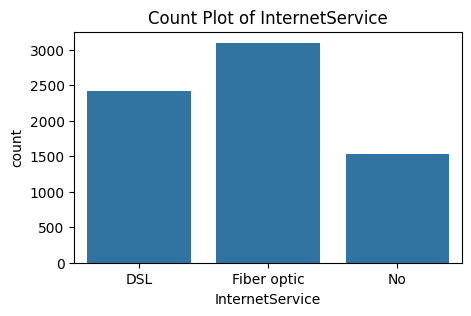

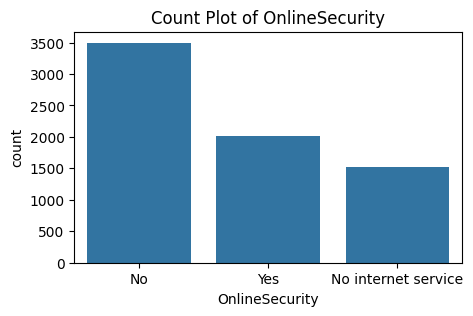

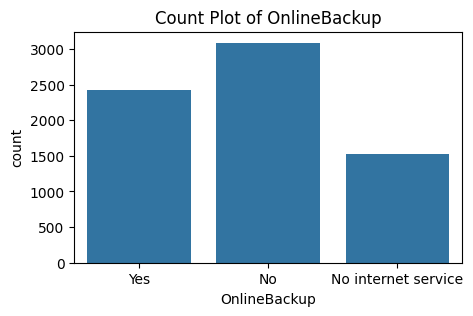

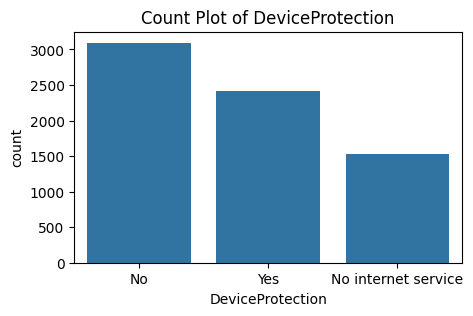

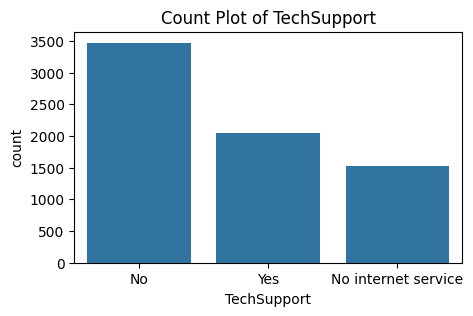

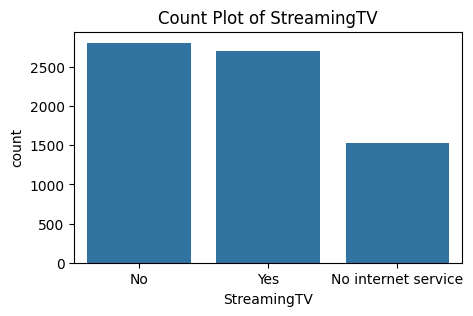

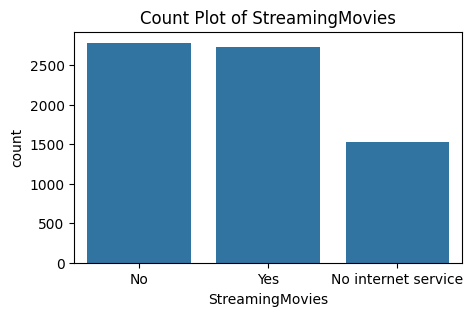

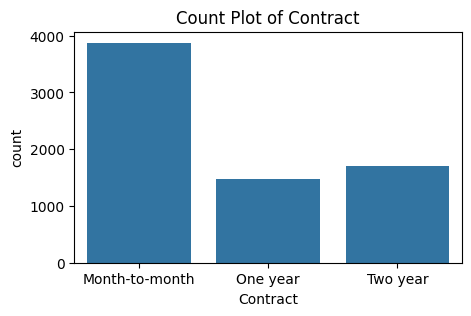

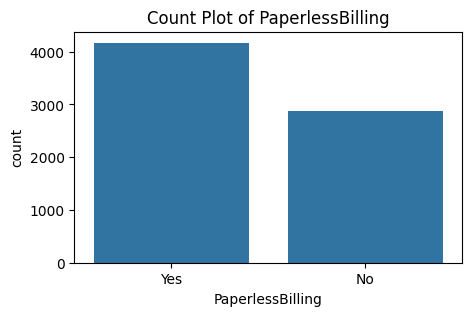

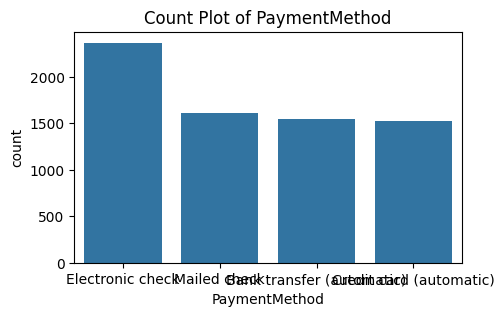

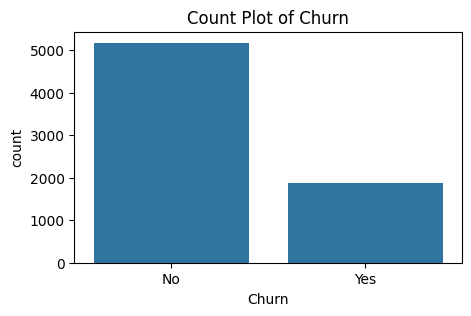

In [139]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**4. Data Preprocessing**

In [140]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [141]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

<ipython-input-141-b6eb27bc3ee0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [142]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [143]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [144]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [145]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [146]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [147]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [148]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Correlation Heatmap for numerical columns**



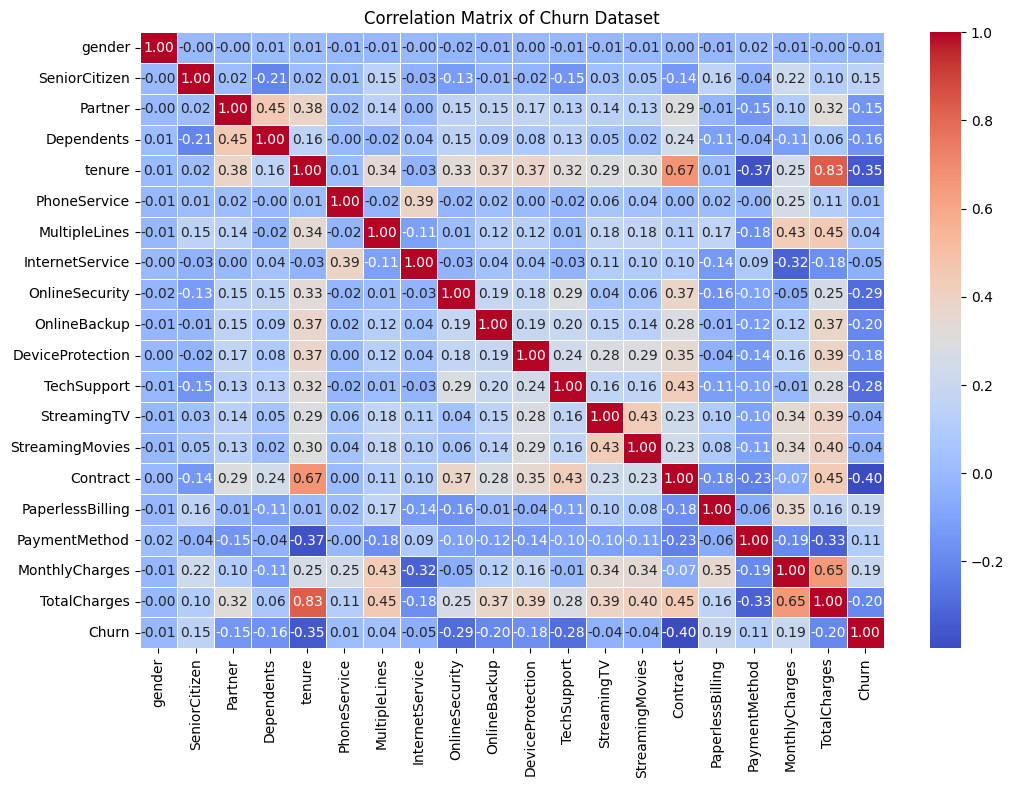

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the churn dataset

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Set up the figure size
plt.figure(figsize=(12, 8))

# Step 3: Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 4: Display the plot
plt.title("Correlation Matrix of Churn Dataset")
plt.show()


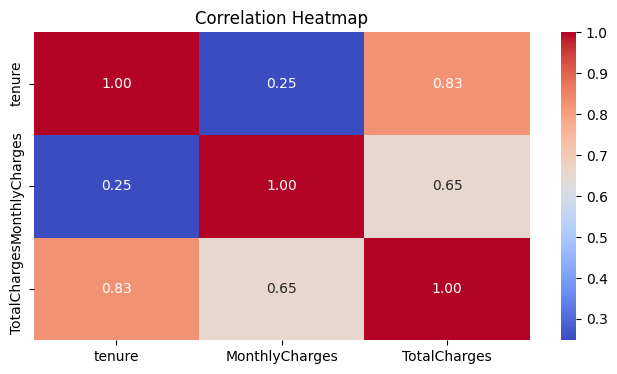

In [150]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**training and test data split**

In [151]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [152]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [153]:
print(y_train.shape)

(4930,)


In [154]:
print(y_train.value_counts())

Churn
0    3622
1    1308
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

**K-Nearest Neighbors Classifier**

================= K-Nearest Neighbors Classifier - Test Data =================
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}
Accuracy of Best KNN Classifier on Test Data: 77.99%

Confusion Matrix on Test Data:
[[1364  188]
 [ 277  284]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



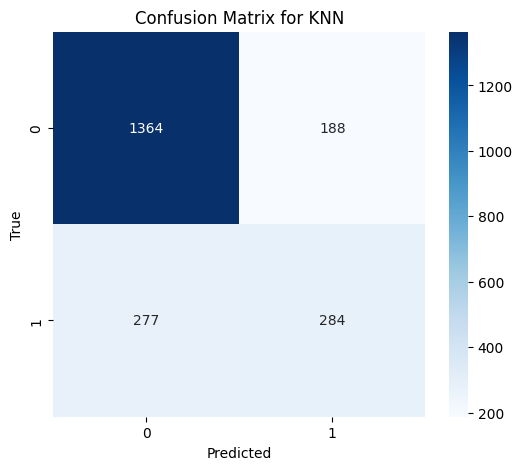

In [155]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint, uniform

# Initialize list to store model accuracy
model_accuracy_list = []

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(3, 20),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
}

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_jobs=-1)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train_encoded)

# Extract the best model and parameters
best_knn_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test data
y_pred_encoded = best_knn_model.predict(X_test_scaled)

# Calculate final accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print results
print("================= K-Nearest Neighbors Classifier - Test Data =================")
print(f"Best Parameters: {best_params}")
print(f"Accuracy of Best KNN Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)

# Append the accuracy to the list for model comparison
model_accuracy_list.append(accuracy)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Naive Bayes**

================= Gaussian Naive Bayes Classifier - Test Data =================
Accuracy of Gaussian Naive Bayes Classifier on Test Data: 74.78%

Confusion Matrix on Test Data:
[[1167  385]
 [ 148  413]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1552
           1       0.52      0.74      0.61       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



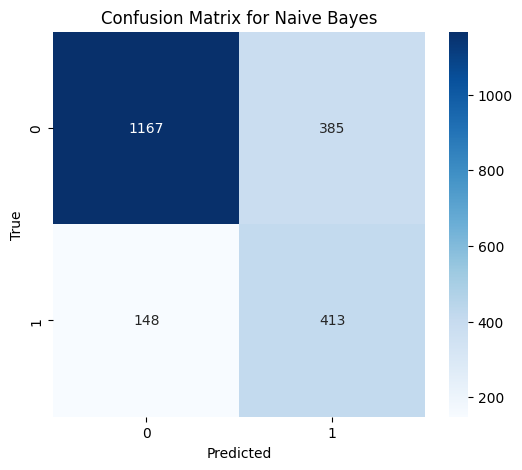

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Gaussian Naive Bayes Classifier - Test Data =================")
print(f"Accuracy of Gaussian Naive Bayes Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Decision Tree Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters from RandomizedSearchCV: {'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 18, 'min_samples_split': 9, 'splitter': 'random'}
================= Decision Tree Classifier - Test Data =================
Accuracy of Decision Tree Classifier on Test Data: 78.18%

Confusion Matrix on Test Data:
[[1408  144]
 [ 317  244]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.63      0.43      0.51       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



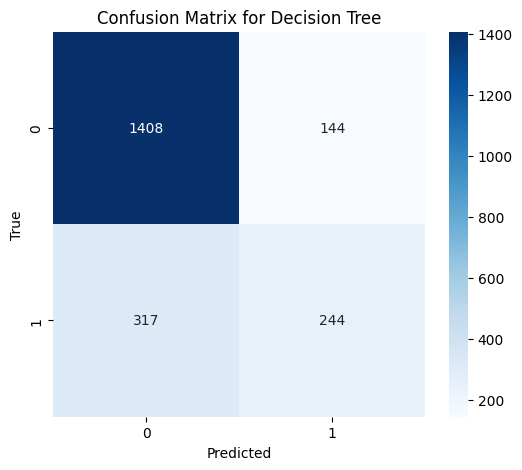

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

# ========================= Decision Tree Model =========================
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 20),  # Depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum samples at leaf node
    'criterion': ['gini', 'entropy'],  # Criterion for the split
    'max_features': ['auto', 'sqrt', 'log2', None],  # Features to consider for the best split
    'splitter': ['best', 'random']  # Strategy to split at each node
}

# ========================= RandomizedSearchCV =========================
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of different hyperparameter combinations to test
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',  # Optimize based on accuracy
    verbose=2,  # Display progress
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Perform the randomized search on the scaled training data
random_search.fit(X_train_scaled, y_train_encoded)

# ========================= Best Parameters =========================
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")

# ========================= Train the Best Model =========================
best_dt_model = random_search.best_estimator_

# Predict on the test data using the best model
y_pred_encoded = best_dt_model.predict(X_test_scaled)

# ========================= Calculate Accuracy =========================
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)

# ========================= Confusion Matrix and Classification Report =========================
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print results
print("================= Decision Tree Classifier - Test Data =================")
print(f"Accuracy of Decision Tree Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Logistic Regression**

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best Parameters from RandomizedSearchCV: {'C': 0.10392247147901224, 'class_weight': None, 'max_iter': 400, 'penalty': 'none', 'solver': 'saga'}
================= Logistic Regression Classifier - Test Data =================
Accuracy of Logistic Regression Classifier on Test Data: 80.45%

Confusion Matrix on Test Data:
[[1380  172]
 [ 241  320]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



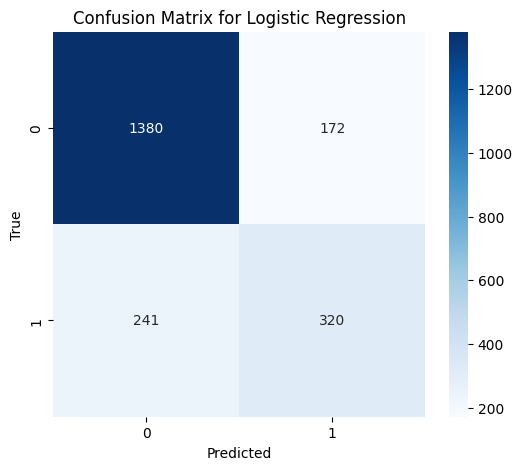

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import uniform, randint

# ========================= Logistic Regression Model =========================
logreg_model = LogisticRegression(max_iter=2000, random_state=42)

# Define the refined hyperparameter search space for RandomizedSearchCV
param_dist = {
    'C': uniform(loc=0.001, scale=5),  # Narrower range for regularization
    'penalty': ['l2', 'none'],  # Use 'none' only for solvers that support it
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Solvers for optimization
    'class_weight': ['balanced', None],  # Handle class imbalance
    'max_iter': [100, 200, 300, 400],  # Iterations for convergence
}

# ========================= RandomizedSearchCV =========================
random_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=param_dist,
    n_iter=30,  # Increase the number of iterations for more exploration
    cv=5,  # Use 5-fold cross-validation for better performance estimation
    scoring='accuracy',  # Optimize based on accuracy
    verbose=2,  # Display progress
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Perform the randomized search on the scaled training data
random_search.fit(X_train_scaled, y_train_encoded)

# ========================= Best Parameters =========================
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")

# ========================= Train the Best Model =========================
best_logreg_model = random_search.best_estimator_

# Predict on the test data using the best model
y_pred_encoded = best_logreg_model.predict(X_test_scaled)

# ========================= Calculate Accuracy =========================
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)

# ========================= Confusion Matrix and Classification Report =========================
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print results
print("================= Logistic Regression Classifier - Test Data =================")
print(f"Accuracy of Logistic Regression Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)



plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Random Forest Classifier**

Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
================= Random Forest Classifier - Test Data =================
Accuracy of Random Forest Classifier on Test Data: 79.70%

Confusion Matrix on Test Data:
[[1408  144]
 [ 285  276]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



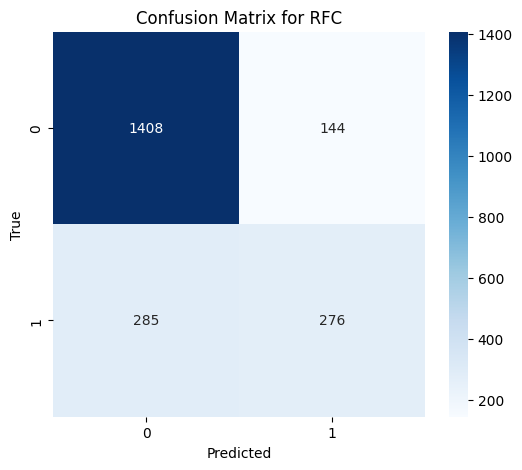

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # n_jobs=-1 to use all CPU cores

# Randomized search for hyperparameter tuning (faster than grid search)
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Only valid options ('sqrt', 'log2', or None)
}

# Use RandomizedSearchCV for faster hyperparameter optimization
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train_encoded)

# Print best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Train the RandomForest model using the best found parameters
best_rf_model = random_search.best_estimator_

# Predict on the test data
y_pred_encoded = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Random Forest Classifier - Test Data =================")
print(f"Accuracy of Random Forest Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)



plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Support Vector Classification**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from RandomizedSearchCV: {'C': 1.3949386065204183, 'class_weight': None, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
================= Support Vector Machine Classifier - Test Data =================
Accuracy of SVM Classifier on Test Data: 79.27%

Confusion Matrix on Test Data:
[[1403  149]
 [ 289  272]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



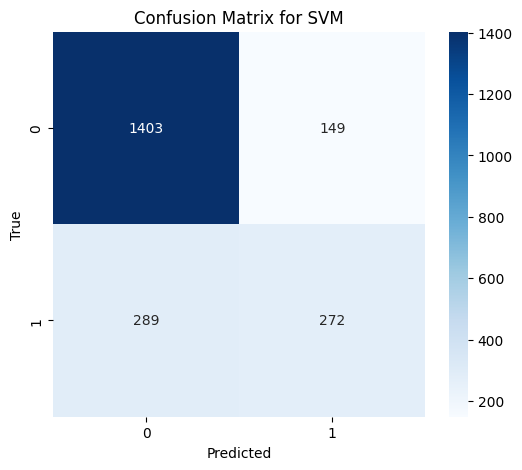

In [160]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import uniform, randint

# Label encoding for target values (if not already encoded)
y_train_encoded = label_encoder.fit_transform(y_train)  # Apply to resampled data
y_test_encoded = label_encoder.transform(y_test)  # Apply label encoding to the test set

# ========================= Feature Scaling =========================
scaler = StandardScaler()

# Feature scaling on the resampled training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test set based on the training data scaler
X_test_scaled = scaler.transform(X_test)

# ========================= SVM Model =========================
svm_model = SVC()

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    'C': uniform(loc=0, scale=10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel
    'degree': randint(2, 6),  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'class_weight': ['balanced', None]  # Handling class imbalance
}

# ========================= RandomizedSearchCV =========================
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of different hyperparameter combinations to test
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=2,  # Print progress
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Perform the randomized search on the training data
random_search.fit(X_train_scaled, y_train_encoded)

# ========================= Best Parameters =========================
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")

# ========================= Train the Best Model =========================
best_svm_model = random_search.best_estimator_

# Predict on the test data using the best model
y_pred_encoded = best_svm_model.predict(X_test_scaled)

# ========================= Calculate Accuracy =========================
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)

# ========================= Confusion Matrix and Classification Report =========================
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

print("================= Support Vector Machine Classifier - Test Data =================")
print(f"Accuracy of SVM Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



**Comparision**

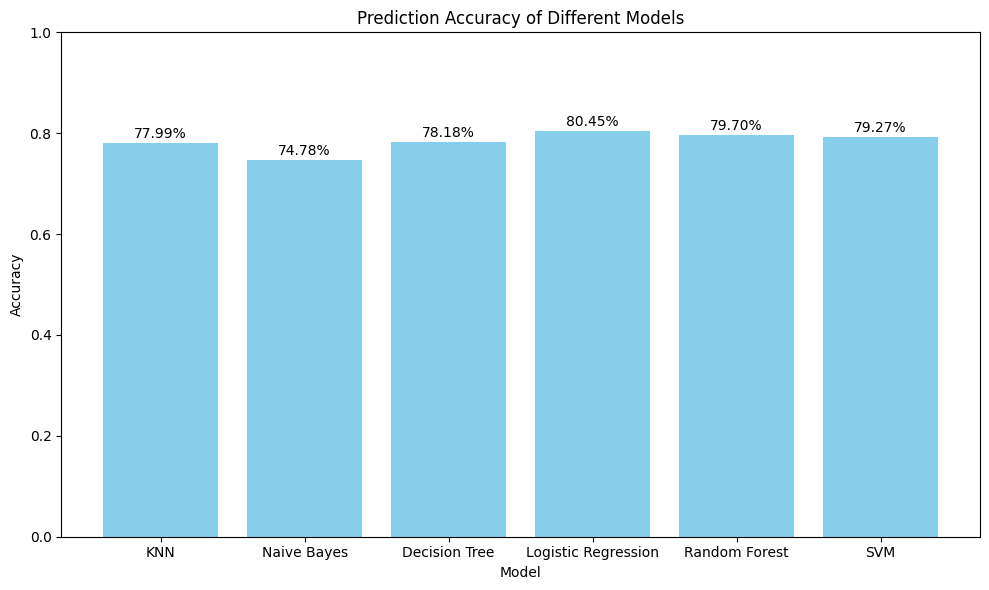

In [161]:
import matplotlib.pyplot as plt

# List of model names
if len(model_accuracy_list) == 6:
    model_names = ["KNN", "Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest", "SVM"]
else:
    model_names = ["KNN", "Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracy_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=0)

# Add the accuracy values on top of the bars
for i, acc in enumerate(model_accuracy_list):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center', fontsize=10)

# Adjusting the top margin to move the "Model" label down
plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()